### Importing Libraries -

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### Visualizing the data -

In [3]:
dataset = pd.read_csv('data/train.csv')

In [4]:
dataset.head()

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,...,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,...,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,...,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,...,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 75 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   surveyid                 1143 non-null   int64  
 1   village                  1143 non-null   int64  
 2   survey_date              1143 non-null   object 
 3   femaleres                1143 non-null   int64  
 4   age                      1143 non-null   float64
 5   married                  1143 non-null   int64  
 6   children                 1143 non-null   int64  
 7   hhsize                   1143 non-null   int64  
 8   edu                      1143 non-null   int64  
 9   hh_children              1143 non-null   int64  
 10  hh_totalmembers          809 non-null    float64
 11  cons_nondurable          1143 non-null   float64
 12  asset_livestock          1143 non-null   float64
 13  asset_durable            1143 non-null   float64
 14  asset_phone             

In [6]:
dataset.describe(include='all')

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
count,1143.000000,1143.000000,1143,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,...,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
unique,NaN,NaN,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,12-Nov-61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,715.927384,76.409449,NaN,0.916885,34.537270,0.772528,2.860017,4.869641,8.735783,2.018373,...,0.015748,0.553462,0.066492,3.564576,3.011114,0.188976,2.269096,0.097988,0.168854,3.295713
std,415.694525,66.788138,NaN,0.276176,13.742107,0.419383,1.846946,2.121852,2.867202,2.016702,...,0.124554,6.489140,0.249249,24.950902,25.840639,0.391661,19.676268,0.297428,0.374787,1.684910
min,1.000000,1.000000,NaN,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-160.153700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,351.500000,23.000000,NaN,1.000000,24.000000,1.000000,2.000000,3.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,717.000000,57.000000,NaN,1.000000,30.000000,1.000000,3.000000,5.000000,9.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1078.500000,105.500000,NaN,1.000000,41.000000,1.000000,4.000000,6.000000,10.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000


In [7]:
pd.set_option('display.max_rows', 100)

### Data Cleaning and Feature Selection -

<AxesSubplot:>

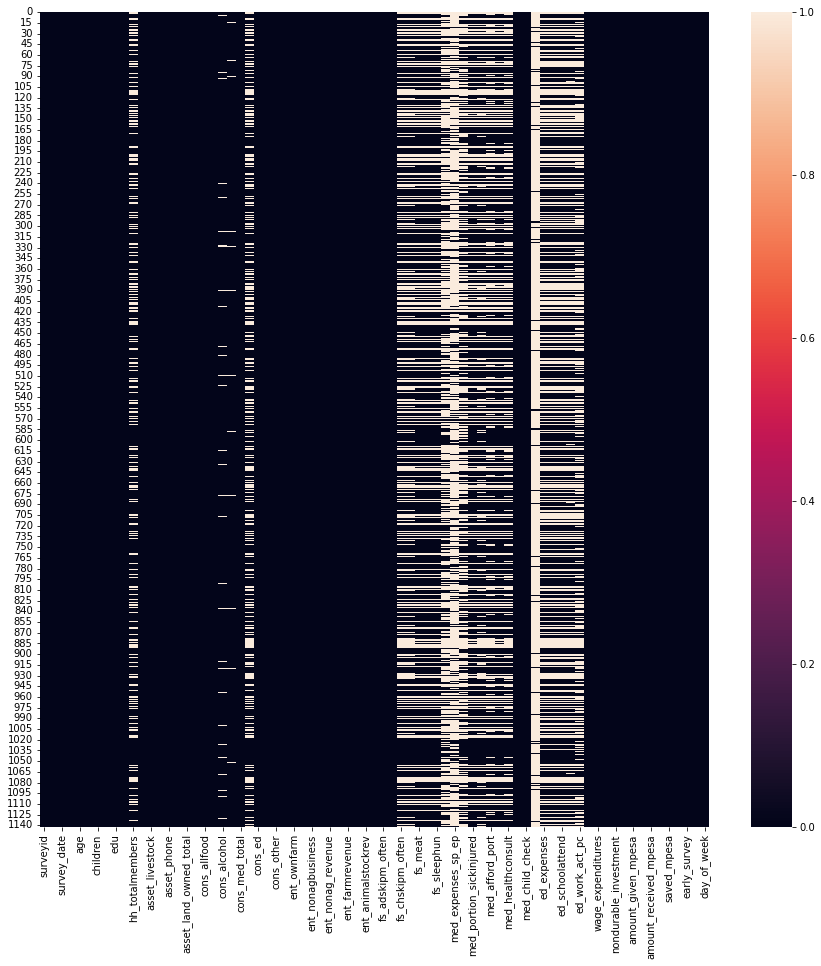

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(dataset.isna(), ax = ax)

In [9]:
dataset.isnull().sum().sort_values(ascending=False)

med_u5_deaths              1084
med_expenses_sp_ep          878
med_expenses_hh_ep          693
med_expenses_child_ep       600
ed_work_act_pc              571
ed_sch_missedpc             467
ed_expenses_perkid          463
ed_expenses                 463
ed_schoolattend             463
med_afford_port             423
med_healthconsult           423
cons_med_children           419
med_port_sick_child         416
fs_chskipm_often            416
fs_chwholed_often           416
fs_meat                     334
fs_enoughtom                334
fs_sleephun                 334
hh_totalmembers             334
med_portion_sickinjured     334
med_sickdays_hhave          334
cons_alcohol                 43
cons_tobacco                 20
labor_primary                 0
net_mpesa                     0
depressed                     0
early_survey                  0
amount_saved_mpesa            0
saved_mpesa                   0
amount_received_mpesa         0
wage_expenditures             0
med_vacc

In [10]:
dataset.isnull().sum().sort_values(ascending=False).index

Index(['med_u5_deaths', 'med_expenses_sp_ep', 'med_expenses_hh_ep',
       'med_expenses_child_ep', 'ed_work_act_pc', 'ed_sch_missedpc',
       'ed_expenses_perkid', 'ed_expenses', 'ed_schoolattend',
       'med_afford_port', 'med_healthconsult', 'cons_med_children',
       'med_port_sick_child', 'fs_chskipm_often', 'fs_chwholed_often',
       'fs_meat', 'fs_enoughtom', 'fs_sleephun', 'hh_totalmembers',
       'med_portion_sickinjured', 'med_sickdays_hhave', 'cons_alcohol',
       'cons_tobacco', 'labor_primary', 'net_mpesa', 'depressed',
       'early_survey', 'amount_saved_mpesa', 'saved_mpesa',
       'amount_received_mpesa', 'wage_expenditures', 'med_vacc_newborns',
       'med_child_check', 'received_mpesa', 'amount_given_mpesa',
       'given_mpesa', 'nondurable_investment', 'durable_investment',
       'surveyid', 'ent_total_cost', 'fs_adwholed_often', 'hh_children',
       'asset_land_owned_total', 'asset_savings', 'asset_phone',
       'asset_durable', 'asset_livestock', 'cons

In [11]:
dataset_nm = dataset.drop(['med_u5_deaths', 'med_expenses_sp_ep', 'med_expenses_hh_ep',
       'med_expenses_child_ep', 'ed_work_act_pc', 'ed_sch_missedpc',
       'ed_expenses_perkid', 'ed_expenses', 'ed_schoolattend',
       'med_afford_port', 'med_healthconsult', 'cons_med_children',
       'med_port_sick_child', 'fs_chskipm_often', 'fs_chwholed_often',
       'fs_meat', 'fs_enoughtom', 'fs_sleephun', 'hh_totalmembers',
       'med_portion_sickinjured', 'med_sickdays_hhave'],axis=1)

In [12]:
dataset_nm.isnull().sum().sort_values(ascending=False)

cons_alcohol              43
cons_tobacco              20
surveyid                   0
ent_nonagbusiness          0
ent_nonag_revenue          0
ent_nonag_flowcost         0
ent_farmrevenue            0
ent_farmexpenses           0
ent_animalstockrev         0
ent_total_cost             0
fs_adskipm_often           0
fs_adwholed_often          0
med_vacc_newborns          0
med_child_check            0
labor_primary              0
wage_expenditures          0
durable_investment         0
nondurable_investment      0
given_mpesa                0
amount_given_mpesa         0
received_mpesa             0
amount_received_mpesa      0
net_mpesa                  0
saved_mpesa                0
amount_saved_mpesa         0
early_survey               0
depressed                  0
ent_employees              0
ent_business               0
village                    0
asset_durable              0
survey_date                0
femaleres                  0
age                        0
married       

In [13]:
dataset_nm[['cons_alcohol','cons_tobacco']].describe()

,cons_alcohol,cons_tobacco
count,1100.000000,1123.000000
mean,1.177717,0.634804
std,6.740545,2.746150
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,104.671880,41.868752


In [14]:
have_null = ['cons_alcohol','cons_tobacco']

for feature in have_null:
    dataset_nm[feature].fillna(dataset_nm[feature].mean(),inplace=True)

In [15]:
dataset_nm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   surveyid                1143 non-null   int64  
 1   village                 1143 non-null   int64  
 2   survey_date             1143 non-null   object 
 3   femaleres               1143 non-null   int64  
 4   age                     1143 non-null   float64
 5   married                 1143 non-null   int64  
 6   children                1143 non-null   int64  
 7   hhsize                  1143 non-null   int64  
 8   edu                     1143 non-null   int64  
 9   hh_children             1143 non-null   int64  
 10  cons_nondurable         1143 non-null   float64
 11  asset_livestock         1143 non-null   float64
 12  asset_durable           1143 non-null   float64
 13  asset_phone             1143 non-null   float64
 14  asset_savings           1143 non-null   

In [16]:
pd.set_option('display.max_columns', None)

In [17]:
dataset_nm.describe(include='all')

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,med_vacc_newborns,med_child_check,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
count,1143.000000,1143.000000,1143,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.0,1143.0,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
unique,NaN,NaN,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,12-Nov-61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,715.927384,76.409449,NaN,0.916885,34.537270,0.772528,2.860017,4.869641,8.735783,2.018373,128.407607,113.703653,148.571309,19.656758,10.254082,0.926868,0.000875,95.806020,8.323766,1.177717,0.634804,2.690428,2.794807,3.647826,21.706431,0.186352,0.247594,0.107612,0.269466,0.032371,34.848492,17.321227,4.516265,1.866727,3.932084,21.414848,4.042870,0.910324,1.0,1.0,0.221347,24.356955,288.501084,34.463737,0.015748,0.553462,0.066492,3.564576,3.011114,0.188976,2.269096,0.097988,0.168854,3.295713
std,415.694525,66.788138,NaN,0.276176,13.742107,0.419383,1.846946,2.121852,2.867202,2.016702,140.159957,239.698375,198.422016,28.053082,79.808523,1.663766,0.029579,114.487290,15.148661,6.612426,2.721997,12.141003,8.331795,7.574917,28.397228,0.389561,0.431804,0.310025,0.443877,0.392355,257.963415,100.532226,8.626985,3.506706,12.199986,101.386778,6.246393,2.594545,0.0,0.0,0.415336,798.985512,385.345212,134.058379,0.124554,6.489140,0.249249,24.950902,25.840639,0.391661,19.676268,0.297428,0.374787,1.684910
min,1.000000,1.000000,NaN,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-160.153700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,351.500000,23.000000,NaN,1.000000,24.000000,1.000000,2.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [18]:
dataset_nm.head(50)

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,med_vacc_newborns,med_child_check,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1,1,0,0,0.000000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1,1,0,0,0.000000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1,1,0,0,0.000000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,378.832920,526.671080,196.989040,24.023054,49.647648,0.00,0,289.173520,36.434967,0.000000,0.000000,4.163996,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.000000,22.288055,1.875133,16.282293,17.890503,0.0,0.0,1,1,0,0,778.112300,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,258.671880,8.260629,173.526540,19.218445,0.000000,0.50,0,173.010990,0.870168,0.000000,0.000000,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.000000,0.533846,2.073101,0.000000,2.073101,0.0,0.0,1,1,1,0,201.005620,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3
5,483,25,08-Sep-61,1,35.0,1,6,8,10,6,63.790752,359.374660,73.670700,0.000000,0.000000,1.70,0,40.938339,2.268844,1.177717,5.582501,0.000000,2.669228,3.069613,11.531066,0,1,0,1,0,4.804611,4.804611,2.268844,0.189070,0.000000,4.993681,7.5,3.0,1,1,0,0,444.256100,7.662909,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,6
6,849,130,31-Oct-61,0,34.0,0,1,3,9,1,60.614365,4.130314,219.250410,0.000000,0.000000,1.00,0,48.963181,0.266923,0.000000,0.000000,0.160154,0.533846,0.066731,10.890451,0,0,0,0,0,0.000000,0.000000,0.266923,0.022244,0.000000,0.022244,20.0,3.0,1,1,0,0,225.622880,0.556089,0,0.0,0,0.000000,0.000000,0,0.000000,0,1,3
7,1386,72,03-Sep-61,1,21.0,1,2,4,10,2,118.070460,120.136330,203.235050,67.264557,48.046108,0.00,0,108.568010,6.099187,0.000000,0.000000,0.000000,2.856074,0.800768,5.845610,0,0,1,0,0,0.000000,0.000000,9.275569,3.697993,0.000000,3.697993,0.0,0.0,1,1,0,0,339.226590,54.600174,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,1
8,930,195,12-Nov-61,1,32.0,1,7,9,9,7,581.574160,1108.756800,252.242080,24.023054,80.076851,4.00,0,469.092860,40.572273,0.000000,0.000000,0.000000,15.134524,30.162281,67.184479,1,0,0,0,0,0.000000,0.000000,32.564587,28.738691,24.690361,55.964821,3.0,0.0,1,1,1,0,1401.838100,151.176190,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,1
9,390,33,28-Nov-61,1,29.0,1,4,6,10,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1,1,0,0,0.000000,0.000000,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


In [ ]:
dataset_nm = dataset_nm.drop(['survey_date'], axis = 1)

# Feature Distribution -

## Observing constant and binary features - 

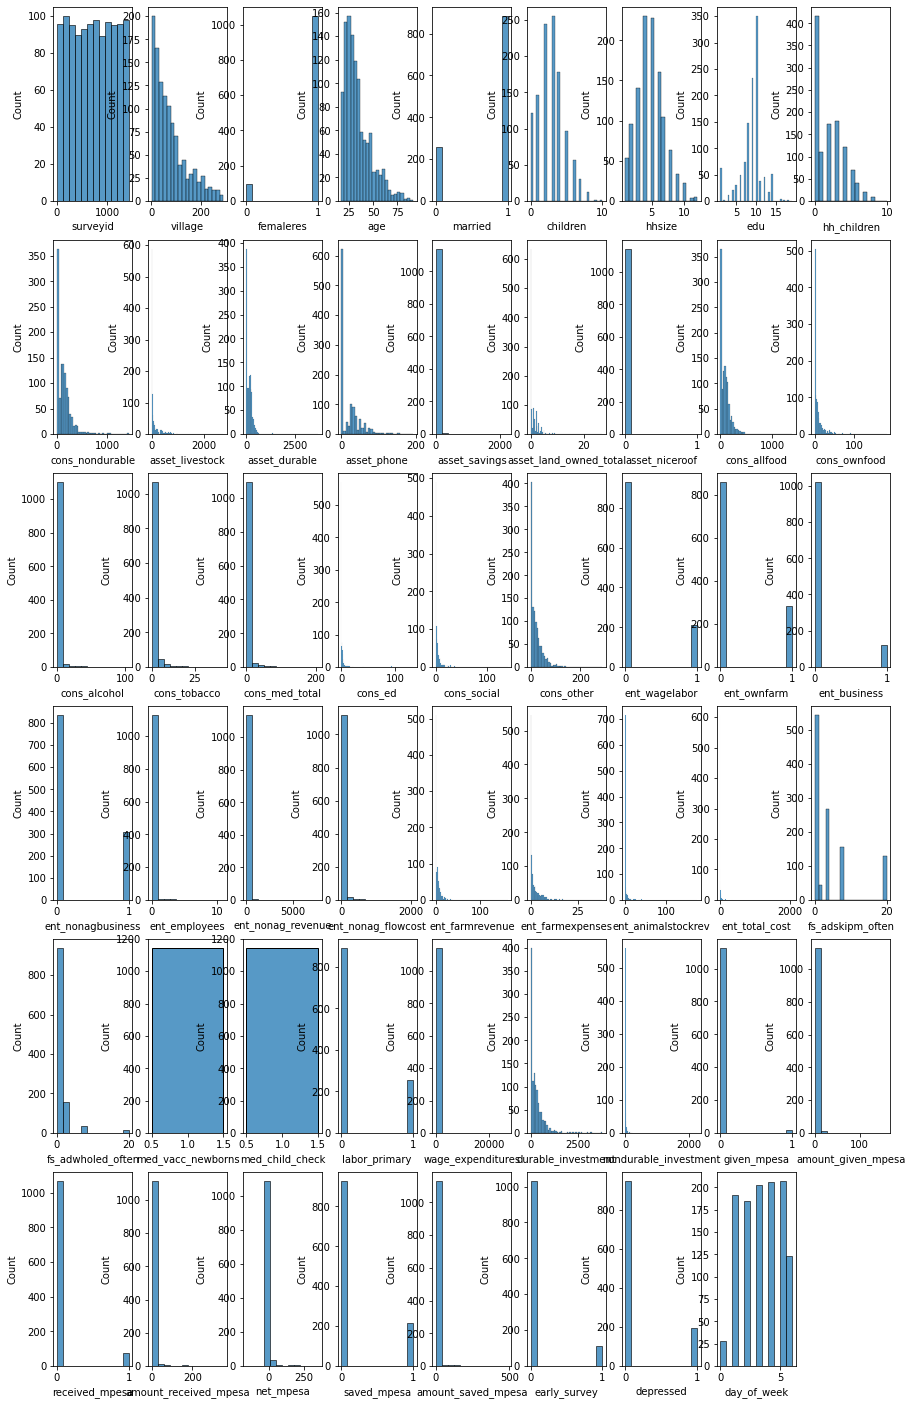

In [20]:
plt.figure(figsize=(15, 25)) 
for i, column in enumerate(dataset_nm.columns, 1):
    plt.subplot(6,9,i)
    sns.histplot(dataset_nm[column])

In [22]:
dataset_nm['med_vacc_newborns'].unique()

array([1], dtype=int64)

In [23]:
dataset_nm['med_child_check'].unique()

array([1], dtype=int64)

In [24]:
dataset_nm = dataset_nm.drop(['med_vacc_newborns', 'med_child_check'], axis = 1)

In [25]:
def is_binary(series):
    return sorted(series.unique()) == [0, 1]

for i in dataset_nm:
    if is_binary(dataset_nm[i]):
        print(i)

femaleres
married
asset_niceroof
ent_wagelabor
ent_ownfarm
ent_business
ent_nonagbusiness
labor_primary
given_mpesa
received_mpesa
saved_mpesa
early_survey
depressed


In [26]:
X = dataset_nm.drop('depressed',axis=1)
y = dataset_nm['depressed']

### Normalizing features -

In [27]:
def normalizeFeatures(X):
    mu=np.mean(X)
    sigma=np.std(X)
    X_norm=(X - mu)/sigma
    return X_norm

norm_X = normalizeFeatures(X)

In [28]:
norm_X

,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,day_of_week
0,0.505575,0.218556,0.301079,-0.475919,0.542633,0.617496,0.532956,0.441117,-1.001266,-0.916551,-0.474569,-0.749092,-0.701005,-0.128540,-0.557334,-0.029591,-0.837193,-0.549713,-0.178185,-0.233315,-0.221695,-0.335586,-0.481777,-0.764720,-0.478573,-0.573646,-0.347258,-0.607340,-0.08254,-0.135150,-0.172371,-0.523734,-0.532564,-0.322443,-0.211312,-0.647516,-0.351014,-0.533169,-0.030498,-0.749010,-0.257193,-0.126491,-0.085328,-0.266885,-0.142926,-0.116577,2.071634,-0.115372,-0.329594,1.011943
1,0.074781,-0.290739,0.301079,-0.839924,0.542633,0.075824,0.061463,-0.256733,-1.001266,-0.916551,-0.474569,-0.749092,-0.701005,-0.128540,-0.557334,-0.029591,-0.837193,-0.549713,-0.178185,-0.233315,-0.221695,-0.335586,-0.481777,-0.764720,-0.478573,-0.573646,-0.347258,-0.607340,-0.08254,-0.135150,-0.172371,-0.523734,-0.532564,-0.322443,-0.211312,-0.647516,-0.351014,-0.533169,-0.030498,-0.749010,-0.257193,-0.126491,-0.085328,3.746929,0.049721,0.069436,-0.482711,-0.115372,-0.329594,-0.175584
2,1.140934,0.578058,0.301079,-0.912725,0.542633,0.075824,0.061463,0.092192,-1.001266,-0.916551,-0.474569,-0.749092,-0.701005,-0.128540,-0.557334,-0.029591,-0.837193,-0.549713,-0.178185,-0.233315,-0.221695,-0.335586,-0.481777,-0.764720,-0.478573,-0.573646,-0.347258,-0.607340,-0.08254,-0.135150,-0.172371,-0.523734,-0.532564,-0.322443,-0.211312,-0.647516,-0.351014,-0.533169,-0.030498,-0.749010,-0.257193,-0.126491,-0.085328,-0.266885,0.178152,0.193446,2.071634,-0.115372,-0.329594,1.011943
3,0.840101,0.308431,0.301079,-0.548720,0.542633,-0.465847,-0.410030,0.441117,-0.009114,1.787493,1.723617,0.244121,0.155712,0.493817,-0.557334,-0.029591,1.689726,1.856501,-0.178185,-0.233315,0.121424,-0.133666,4.770942,0.786894,-0.478573,1.743235,-0.347258,1.646523,-0.08254,-0.010928,-0.172371,2.060925,0.002398,1.012756,-0.034777,-0.647516,-0.351014,-0.533169,-0.030498,1.271134,0.259374,-0.126491,-0.085328,-0.266885,-0.142926,-0.116577,2.071634,-0.051857,-0.329594,-1.956873
4,0.216775,-0.515429,-3.321382,1.780909,-1.842866,0.617496,0.532956,0.441117,0.983038,0.929804,-0.440091,0.125824,-0.015631,-0.128540,-0.256680,-0.029591,0.674649,-0.492245,-0.178185,-0.233315,-0.155711,-0.063155,0.586393,1.860047,2.089545,-0.573646,-0.347258,-0.607340,-0.08254,-0.135150,-0.172371,-0.461826,0.058877,-0.322443,-0.190855,-0.647516,-0.351014,1.875576,-0.030498,-0.227157,-0.224790,-0.126491,-0.085328,-0.266885,-0.142926,-0.116577,-0.482711,-0.115372,-0.329594,-0.175584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.507981,1.132291,0.301079,0.106488,-1.842866,0.617496,0.061463,0.092192,-1.001266,-0.916551,-0.474569,-0.749092,-0.701005,-0.128540,-0.557334,-0.029591,-0.837193,-0.549713,-0.178185,-0.233315,-0.221695,-0.335586,-0.481777,-0.764720,-0.478573,-0.573646,-0.347258,-0.607340,-0.08254,-0.135150,-0.172371,-0.523734,-0.532564,-0.322443,-0.211312,-0.647516,-0.351014,-0.533169,-0.030498,-0.749010,-0.257193,-0.126491,-0.085328,-0.266885,-0.142926,-0.116577,-0.482711,-0.115372,-0.329594,0.418180
1139,0.777528,0.413286,0.301079,-0.839924,0.542633,-1.549189,-1.353015,0.441117,-1.001266,-0.252210,-0.440091,0.740727,0.726857,-0.128540,0.043975,-0.029591,-0.339

In [29]:
X_train, X_test, y_train, y_test = train_test_split(norm_X, y, test_size=0.25, random_state=10)

In [30]:
X_train

,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,day_of_week
75,-0.074432,0.563079,0.301079,-0.694322,0.542633,-1.007518,-0.881522,-0.605658,-0.505190,-0.140796,-0.474569,0.522705,1.012430,-0.128540,0.945939,-0.029591,-0.407300,-0.285293,-0.178185,-0.233315,0.636104,-0.335586,-0.358391,0.931335,2.089545,-0.573646,-0.347258,-0.607340,-0.08254,-0.135150,-0.172371,-0.523734,-0.532564,0.005884,-0.211312,-0.167029,-0.351014,1.875576,-0.030498,0.059707,-0.257193,-0.126491,-0.085328,-0.266885,-0.142926,-0.116577,-0.482711,-0.115372,-0.329594,0.418180
829,-0.076839,0.712872,0.301079,-0.694322,0.542633,0.075824,0.061463,0.441117,0.486962,-0.354590,-0.474569,-0.244411,-0.301204,-0.128540,0.043975,-0.029591,-0.465432,-0.426317,-0.178185,-0.233315,-0.221695,0.569846,2.134006,-0.453269,-0.478573,-0.573646,-0.347258,-0.607340,-0.08254,-0.135150,-0.172371,-0.307056,-0.465297,-0.322443,-0.208985,0.553703,0.034579,-0.533169,-0.030498,-0.480823,-0.199160,-0.126491,-0.085328,3.746929,6.278638,6.083881,2.071634,-0.115372,-0.329594,0.418180
88,0.127728,1.012457,0.301079,-0.839924,0.542633,0.075824,0.061463,-0.256733,0.486962,-0.179035,-0.474569,-0.422059,-0.015631,0.032068,3.050520,-0.029591,-0.152616,-0.373433,-0.178185,-0.233315,-0.221695,-0.191358,-0.323138,0.030835,-0.478573,-0.573646,-0.347258,-0.607340,-0.08254,-0.135150,-0.172371,-0.214194,-0.415799,-0.322443,-0.207273,-0.647516,-0.351014,-0.533169,-0.030498,-0.570219,-0.149560,-0.126491,-0.085328,-0.266885,-0.142926,-0.116577,-0.482711,-0.115372,3.034033,1.605706
242,1.167408,2.255737,-3.321382,2.144913,-1.842866,-1.549189,-1.824508,-0.605658,-1.001266,-0.916551,-0.474569,-0.749092,-0.701005,-0.128540,-0.557334,-0.029591,-0.837193,-0.549713,-0.178185,-0.233315,-0.221695,-0.335586,-0.481777,-0.764720,-0.478573,-0.573646,-0.347258,-0.607340,-0.08254,-0.135150,-0.172371,-0.523734,-0.532564,-0.322443,-0.211312,-0.647516,-0.351014,-0.533169,-0.030498,-0.749010,-0.257193,-0.126491,-0.085328,-0.266885,-0.142926,-0.116577,-0.482711,-0.115372,-0.329594,0.418180
418,-1.128551,-0.785055,0.301079,0.543293,0.542633,0.617496,1.475941,-0.256733,-1.001266,-0.916551,-0.474569,-0.749092,-0.701005,-0.128540,-0.557334,-0.029591,-0.837193,-0.549713,-0.178185,-0.233315,-0.221695,-0.335586,-0.481777,-0.764720,-0.478573,-0.573646,-0.347258,-0.607340,-0.08254,-0.135150,-0.172371,-0.523734,-0.532564,-0.322443,-0.211312,-0.647516,-0.351014,-0.533169,-0.030498,-0.749010,-0.257193,-0.126491,-0.085328,-0.266885,-0.142926,-0.116577,-0.482711,-0.115372,-0.329594,1.011943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,-1.585818,-1.024724,0.301079,-0.912725,0.542633,0.617496,0.532956,-0.256733,0.983038,-0.671161,-0.440091,0.001874,0.155712,-0.128540,0.705415,-0.029591,-0.642064,-0.549713,-0.178185,-0.233315,-0.221695,-0.015079,-0.277309,-0.488815,2.089545,-0.573646,-0.347258,-0.607340,-0.08254,-0.135150,-0.172371,-0.523734,-0.532564,-0.322443,-0.211312,0.553703,-0.351014,1.875576,-0.030498,-0.332560,-0.237273,-0.126491,-0.085328,-0.266885,-0.142926,-0.116577,-0.482711,-0.115372,-0.329594,-1.363110
1097,1.653554,2.780011,0.301079,-0.621521,0.542633,0.617496,0.532956,0.441117,0.983038,0.471360,-0.329465,0.339405,0.726857,0.032068,-0.557334,-0.

In [31]:
accuracy_dict = {}
roc_dict = {}

## Model Building & Training -

### Logistic Regression with GridSearchCV

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 2000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       248
           1       0.17      0.03      0.05        38

    accuracy                           0.85       286
   macro avg       0.52      0.50      0.48       286
weighted avg       0.77      0.85      0.80       286



In [77]:
from sklearn.model_selection import GridSearchCV
parameters = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
model_gs = GridSearchCV(LogisticRegression(), parameters, refit=True, verbose=1, cv = 7)
model_gs.fit(X_train, y_train)

Fitting 7 folds for each of 14 candidates, totalling 98 fits


GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [78]:
y_pred_grid = model_gs.predict(X_test)
print(model_gs.best_params_)
print(classification_report(y_test,y_pred_grid))

{'C': 0.001, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       248
           1       0.00      0.00      0.00        38

    accuracy                           0.87       286
   macro avg       0.43      0.50      0.46       286
weighted avg       0.75      0.87      0.81       286



In [79]:
accuracy_dict['Logistic Regression(+GCV)'] = model_gs.score(X_test, y_test)
prob = model_gs.predict_proba(X_test)
roc_dict['Logistic Regression(+GCV)'] = roc_auc_score(y_test, prob[:,1])

### SVM with GridSearchCV

In [80]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       248
           1       1.00      0.03      0.05        38

    accuracy                           0.87       286
   macro avg       0.94      0.51      0.49       286
weighted avg       0.89      0.87      0.81       286



In [81]:
from sklearn.model_selection import GridSearchCV
parameters = { 'C': [100, 1000], 'gamma': [0.001, 0.0001]}
model_svc = GridSearchCV( SVC(probability=True), parameters, refit=True, verbose=1, cv = 9)
model_svc.fit(X_train, y_train)

Fitting 9 folds for each of 4 candidates, totalling 36 fits


GridSearchCV(cv=9, estimator=SVC(probability=True),
             param_grid={'C': [100, 1000], 'gamma': [0.001, 0.0001]},
             verbose=1)

In [82]:
y_pred_grid_svc = model_svc.predict(X_test)
print(model_svc.best_params_)
print(classification_report(y_test,y_pred_grid_svc))

{'C': 100, 'gamma': 0.0001}
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       248
           1       0.00      0.00      0.00        38

    accuracy                           0.87       286
   macro avg       0.43      0.50      0.46       286
weighted avg       0.75      0.87      0.81       286



In [83]:
accuracy_dict['SVM(+GCV)'] = model_svc.score(X_test, y_test)
prob = model_svc.predict_proba(X_test)
roc_dict['SVM(+GCV)'] = roc_auc_score(y_test, prob[:,1])

### Decision Tree Classifier 

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)

In [62]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       248
           1       0.17      0.24      0.20        38

    accuracy                           0.74       286
   macro avg       0.52      0.53      0.52       286
weighted avg       0.78      0.74      0.76       286



In [63]:
accuracy_dict['Decision Tree'] = dt_model.score(X_test, y_test)
prob = dt_model.predict_proba(X_test)
roc_dict['Decision Tree'] = roc_auc_score(y_test, prob[:,1])

### Naive Bayes Classifier

In [66]:
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, y, test_size=0.25, random_state=10)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_nb, y_train_nb)
gnb_pred = gnb.predict(X_test_nb)
print(classification_report(y_test_nb, gnb_pred))

              precision    recall  f1-score   support

           0       0.85      0.09      0.16       248
           1       0.13      0.89      0.23        38

    accuracy                           0.20       286
   macro avg       0.49      0.49      0.19       286
weighted avg       0.75      0.20      0.17       286



In [67]:
accuracy_dict['Naive Bayes'] = gnb.score(X_test, y_test)
prob = gnb.predict_proba(X_test)
roc_dict['Naive Bayes'] = roc_auc_score(y_test, prob[:,1])

### Random Forest with Grid Search

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
parameters = {'n_estimators': [30, 40, 50], 'max_depth':[4,5,6], 'criterion':['gini', 'entropy']}
CV_rfc = GridSearchCV(rfc, parameters, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6], 'n_estimators': [30, 40, 50]})

In [85]:
print(CV_rfc.best_params_)
y_pred_rfc = CV_rfc.predict(X_test)
print(classification_report(y_test,y_pred_rfc))

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 30}
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       248
           1       0.00      0.00      0.00        38

    accuracy                           0.87       286
   macro avg       0.43      0.50      0.46       286
weighted avg       0.75      0.87      0.81       286



In [86]:
accuracy_dict['Random Forest(+GCV)'] = CV_rfc.score(X_test, y_test)
prob = CV_rfc.predict_proba(X_test)
roc_dict['Random Forest(+GCV)'] = roc_auc_score(y_test, prob[:,1])

### K-nearest neighbor with Grid Search CV

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [74]:
print(grid.best_params_)
y_pred_knn=grid.predict(X_test)
print(classification_report(y_test,y_pred_knn))

{'n_neighbors': 14}
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       248
           1       0.00      0.00      0.00        38

    accuracy                           0.86       286
   macro avg       0.43      0.50      0.46       286
weighted avg       0.75      0.86      0.80       286



In [75]:
accuracy_dict['KNN(+GCV)'] = grid.score(X_test, y_test)
prob = grid.predict_proba(X_test)
roc_dict['KNN(+GCV)'] = roc_auc_score(y_test, prob[:,1])

### Bagging along with Random Forest

In [90]:
from sklearn.ensemble import BaggingClassifier
baggingclf1 = BaggingClassifier(max_features=13, random_state=1)
baggingclf1.fit(X_train, y_train)

BaggingClassifier(max_features=13, random_state=1)

In [91]:
y_pred_bgg=baggingclf1.predict(X_test)
print(classification_report(y_test,y_pred_bgg))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       248
           1       0.29      0.05      0.09        38

    accuracy                           0.86       286
   macro avg       0.58      0.52      0.51       286
weighted avg       0.79      0.86      0.81       286



In [92]:
accuracy_dict['Random Forest(+Bagging)'] = baggingclf1.score(X_test, y_test)
prob = baggingclf1.predict_proba(X_test)
roc_dict['Random Forest(+Bagging)'] = roc_auc_score(y_test, prob[:,1])

### Gradient Boosting Classifier with Grid Search

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
parameters = {
    "learning_rate": [0.01, 0.075, 0.1],
    "criterion": ["friedman_mse",  "mae"],
    "n_estimators":[10]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.075, 0.1],
                         'n_estimators': [10]})

In [95]:
print(clf.best_params_)
y_pred_gb = clf.predict(X_test)
print(classification_report(y_test, y_pred_gb))

{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'n_estimators': 10}
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       248
           1       0.00      0.00      0.00        38

    accuracy                           0.87       286
   macro avg       0.43      0.50      0.46       286
weighted avg       0.75      0.87      0.81       286



In [96]:
accuracy_dict['Gradient Boosting(+GCV)'] = clf.score(X_test, y_test)
prob = clf.predict_proba(X_test)
roc_dict['Gradient Boosting(+GCV)'] = roc_auc_score(y_test, prob[:,1])

### Extreme Gradient Boosting (XGBoost) Classifier

In [97]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)

[17:15:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [98]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       248
           1       0.12      0.05      0.07        38

    accuracy                           0.82       286
   macro avg       0.49      0.50      0.49       286
weighted avg       0.77      0.82      0.79       286



In [99]:
accuracy_dict['XGBoost'] = xgb.score(X_test, y_test)
prob = xgb.predict_proba(X_test)
roc_dict['XGBoost'] = roc_auc_score(y_test, prob[:,1])

### Neural Network (MLP-Multilayer Perceptron Classifier)

In [100]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [101]:
mlp_pred = mlp.predict(X_test)
print(classification_report(y_test, mlp_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       248
           1       0.21      0.21      0.21        38

    accuracy                           0.79       286
   macro avg       0.54      0.54      0.54       286
weighted avg       0.79      0.79      0.79       286



In [102]:
accuracy_dict['MLP'] = mlp.score(X_test, y_test)
prob = mlp.predict_proba(X_test)
roc_dict['MLP'] = roc_auc_score(y_test, prob[:,1])

## Evaluation -

### Accuracy Comparison -

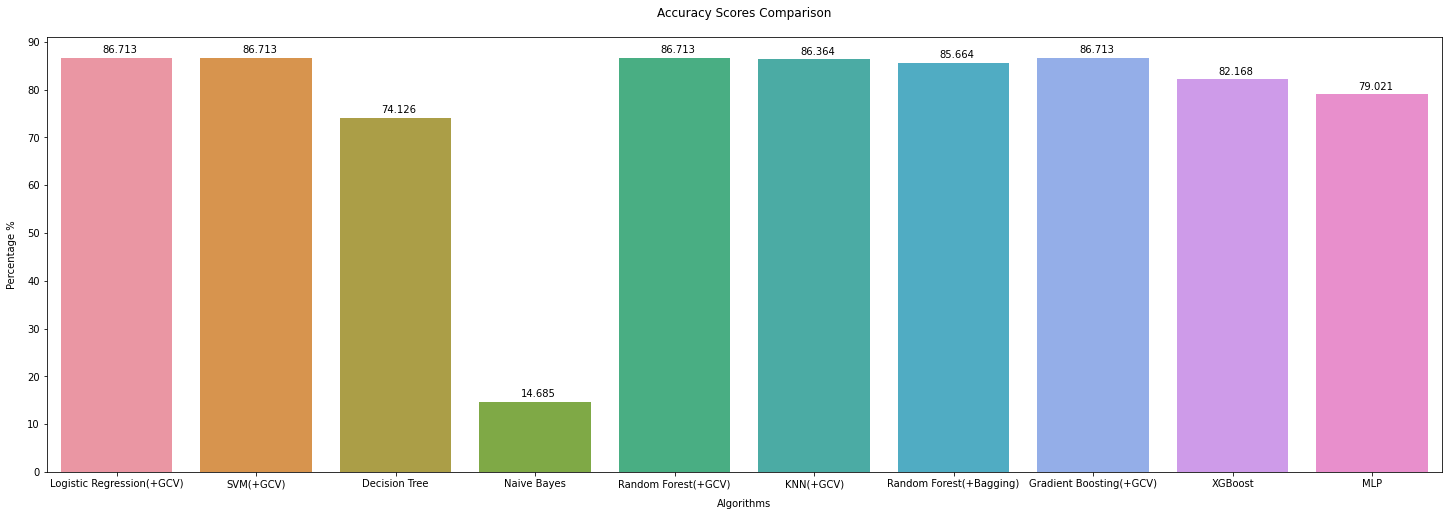

In [115]:
plt.figure(figsize=(25,8))
sns.set_palette('cividis')
ax=sns.barplot(x=list(accuracy_dict.keys()),y=list(round(i*100,3) for i in accuracy_dict.values()))
plt.yticks(np.arange(0,100,10))
plt.ylabel('Percentage %',labelpad=10)
plt.xlabel('Algorithms',labelpad=10)
plt.title('Accuracy Scores Comparison',pad=20)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),xytext=(p.get_x()+0.3,p.get_height()+1.02))
plt.show()

### ROC-AUC Score Comparison - 

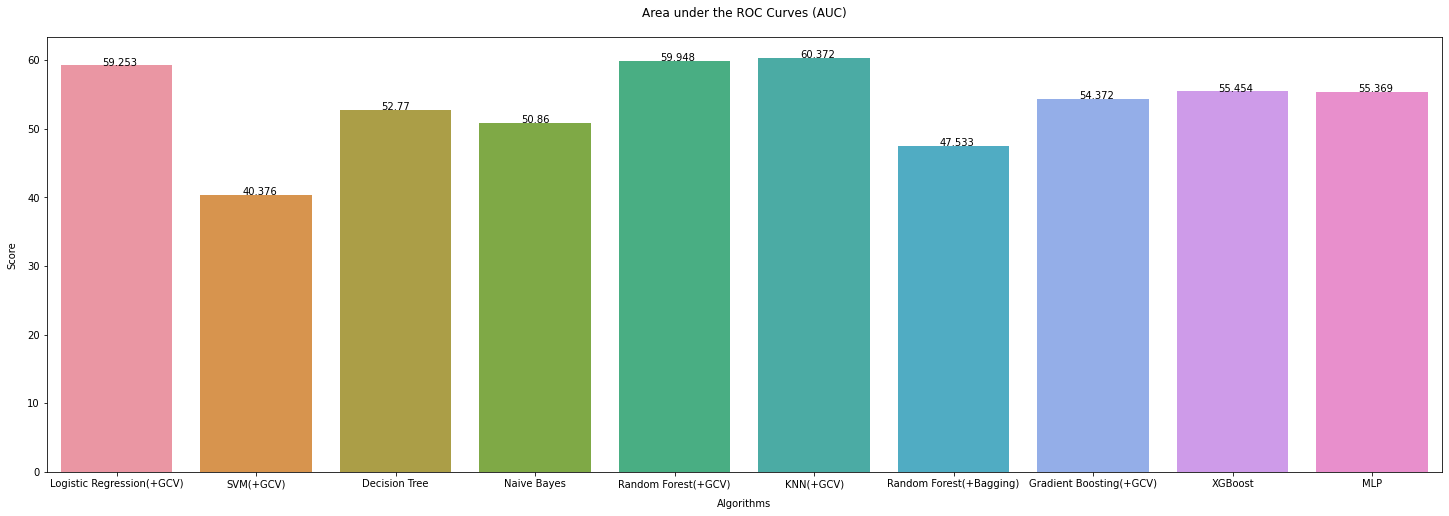

In [119]:
plt.figure(figsize=(25,8))
sns.set_palette('magma')
ax=sns.barplot(x=list(roc_dict.keys()),y=list(round(i*100,3) for i in roc_dict.values()))
#plt.yticks(np.arange(0,100,10))
plt.ylabel('Score',labelpad=10)
plt.xlabel('Algorithms',labelpad=10)
plt.title('Area under the ROC Curves (AUC)',pad=20)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),xytext=(p.get_x()+0.3,p.get_height()+0.01))
plt.show()

The evaluation shows that (evaluating by Accuracy), with Grid Search, Logistic Regression, SVM, KNN and Gradient Boosting and without Grid Search, Random Forest with Bagging and XGBoost seem to deliver the best performance.